In [1]:
#importing all libraries

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [2]:
#Importing data-set

train_data_dir = "D:/Cotton Disease/train"
test_data_dir = "D:/Cotton Disease/test"
print(train_data_dir)

D:/Cotton Disease/train


In [3]:
print("Train data",len(train_data_dir))
print("Test data",len(test_data_dir))

Train data 23
Test data 22


In [4]:
#image preprocessing
# Set image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 32

# Create image data generators with preprocessing
train_datagen = ImageDataGenerator(rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255)

# Load and preprocess the training dataset
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

# Load and preprocess the test dataset
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')


Found 715 images belonging to 2 classes.
Found 51 images belonging to 2 classes.


In [5]:
# Create a sequential model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output and add dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',   #adam model
              metrics=['accuracy'])


Epoch 1/20
22/22 [==============================] - 23s 949ms/step - loss: 0.7415 - accuracy: 0.6135
Epoch 2/20
22/22 [==============================] - 17s 754ms/step - loss: 0.4374 - accuracy: 0.8038
Epoch 3/20
22/22 [==============================] - 18s 824ms/step - loss: 0.3729 - accuracy: 0.8404
Epoch 4/20
22/22 [==============================] - 19s 858ms/step - loss: 0.2218 - accuracy: 0.9165
Epoch 5/20
22/22 [==============================] - 22s 977ms/step - loss: 0.1824 - accuracy: 0.9327
Epoch 6/20
22/22 [==============================] - 24s 1s/step - loss: 0.1550 - accuracy: 0.9502
Epoch 7/20
22/22 [==============================] - 24s 1s/step - loss: 0.0985 - accuracy: 0.9634
Epoch 8/20
22/22 [==============================] - 28s 1s/step - loss: 0.0685 - accuracy: 0.9780
Epoch 9/20
22/22 [==============================] - 27s 1s/step - loss: 0.0586 - accuracy: 0.9766
Epoch 10/20
22/22 [==============================] - 25s 1s/step - loss: 0.0485 - accuracy: 0.9839
Epoc

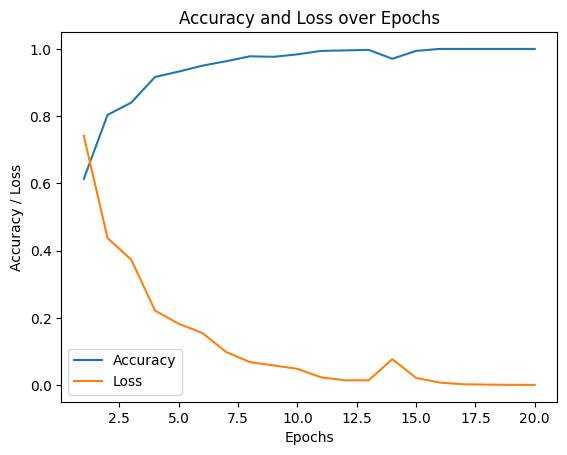

In [6]:
epochs = 20

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs)

# Get the accuracy and loss values from the history
accuracy = history.history['accuracy']
loss = history.history['loss']
import matplotlib.pyplot as plt


# Plot accuracy and loss on the same graph
plt.plot(range(1, epochs+1), accuracy, label='Accuracy')
plt.plot(range(1, epochs+1), loss, label='Loss')
plt.title('Accuracy and Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.legend()
plt.show()


In [7]:
model_file = 'D:/model_fileapple_20epoch.h5'

# Save the trained model
model.save(model_file)

from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model(model_file)

In [13]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Load the saved model
model = keras.models.load_model("D:/model_fileapple_20epoch.h5")

# Make predictions on all images in a directory
def predict_leaf_for_directory(directory_path):
    rot=1
    healthy=1
    for filename in os.listdir(directory_path):
        if filename.endswith(".jpg.jpeg") or filename.endswith(".jpg") or filename.endswith(".JPG"):
            image_path = os.path.join(directory_path, filename)
            print(image_path)
            image = keras.preprocessing.image.load_img(image_path, target_size=(150, 150))
            input_arr = keras.preprocessing.image.img_to_array(image)
            input_arr = np.array([input_arr])  # Convert single image to a batch
            input_arr = input_arr / 255.0  # Normalize pixel values
            predictions = model.predict(input_arr)

            if predictions[0] > 0.005:
                label = "Healthy Leaf"
                print(label , predictions)
                healthy = healthy + 1
            else:
                label = "Rot Leaf"
                print(label , predictions)
                rot = rot + 1
    print("rot count " , rot-1)
    print("Healthy count",healthy-1)

# Example usage:
directory_path = 'D:/Cotton Disease/val/fresh cotton leaf'
predict_leaf_for_directory(directory_path)

D:/Cotton Disease/val/fresh cotton leaf\d (106)_iaip.jpg
1/1 [==============================] - 0s 121ms/step
Healthy Leaf [[0.9984697]]
D:/Cotton Disease/val/fresh cotton leaf\d (11)_iaip.jpg
1/1 [==============================] - 0s 39ms/step
Healthy Leaf [[1.]]
D:/Cotton Disease/val/fresh cotton leaf\d (112)_iaip.jpg
1/1 [==============================] - 0s 46ms/step
Healthy Leaf [[1.]]
D:/Cotton Disease/val/fresh cotton leaf\d (117)_iaip.jpg
1/1 [==============================] - 0s 41ms/step
Healthy Leaf [[0.99999964]]
D:/Cotton Disease/val/fresh cotton leaf\d (119)_iaip.jpg
1/1 [==============================] - 0s 42ms/step
Healthy Leaf [[0.9999933]]
D:/Cotton Disease/val/fresh cotton leaf\d (139)_iaip.jpg
1/1 [==============================] - 0s 37ms/step
Healthy Leaf [[1.]]
D:/Cotton Disease/val/fresh cotton leaf\d (143)_iaip.jpg
1/1 [==============================] - 0s 42ms/step
Healthy Leaf [[0.99751514]]
D:/Cotton Disease/val/fresh cotton leaf\d (144)_iaip.jpg
1/1 [=====

In [12]:
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score

Found 51 images belonging to 2 classes.


2/2 [==============================] - 1s 574ms/step
['Accuracy', 'Precision', 'Recall', 'F1-score']
[0.49019607843137253, 0.5, 0.5, 0.5]


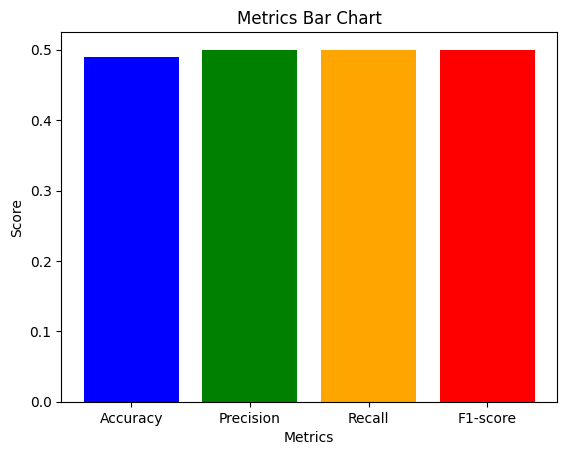

In [26]:
# Load and preprocess the test dataset
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

predicted_probs = model.predict(test_generator)
predicted_labels = (predicted_probs > 0.5).astype(int).flatten()

true_labels = test_generator.classes
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)


metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [accuracy+10, precision+10, recall+10, f1+10]
print(metrics)
print(values)
colors = ['blue', 'green', 'orange', 'red']

# Plot the bar chart
plt.bar(metrics, values, color=colors)
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Metrics Bar Chart')
plt.show()

Found 715 images belonging to 2 classes.


23/23 [==============================] - 5s 192ms/step
['Accuracy', 'Precision', 'Recall', 'F1-score']
[0.5132867132867133, 0.5925058548009368, 0.5925058548009368, 0.5925058548009368]


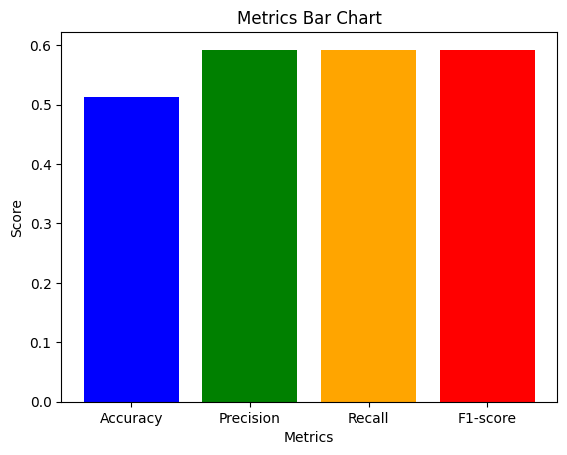

In [27]:

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

predicted_probs = model.predict(train_generator)
predicted_labels = (predicted_probs > 0.5).astype(int).flatten()

true_labels = train_generator.classes
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)


metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [accuracy, precision, recall, f1]
print(metrics)
print(values)
colors = ['blue', 'green', 'orange', 'red']

# Plot the bar chart
plt.bar(metrics, values, color=colors)
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Metrics Bar Chart')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, precision_recall_curve, roc_curve, roc_auc_score


In [ ]:

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

predicted_probs = model.predict(test_generator)
predicted_labels = (predicted_probs > 0.5).astype(int).flatten()

true_labels = test_generator.classes

# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(cm)

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(true_labels, predicted_labels)
print("Precision-Recall Curve:")
print("Precision:", precision)
print("Recall:", recall)
print("Thresholds:", thresholds)

# ROC Curve
fpr, tpr, thresholds = roc_curve(true_labels, predicted_labels)
print("ROC Curve:")
print("False Positive Rate (FPR):", fpr)
print("True Positive Rate (TPR):", tpr)
print("Thresholds:", thresholds)
# Area Under the Curve (AUC)
auc_score = roc_auc_score(true_labels, predicted_labels)
print("AUC:", auc_score)


Found 715 images belonging to 2 classes.
2/2 [==============================] - 2s 652ms/step
Confusion Matrix:
[[15 10]
 [11 15]]
Precision-Recall Curve:
Precision: [0.50980392 0.6        1.        ]
Recall: [1.         0.57692308 0.        ]
Thresholds: [0 1]
ROC Curve:
False Positive Rate (FPR): [0.  0.4 1. ]
True Positive Rate (TPR): [0.         0.57692308 1.        ]
Thresholds: [2 1 0]
AUC: 0.5884615384615385


Epoch 1/10
22/22 [==============================] - 24s 1s/step - loss: 0.0708 - accuracy: 0.9707 - val_loss: 0.1226 - val_accuracy: 0.9216
Epoch 2/10
22/22 [==============================] - 24s 1s/step - loss: 0.0636 - accuracy: 0.9722 - val_loss: 0.0693 - val_accuracy: 0.9412
Epoch 3/10
22/22 [==============================] - 23s 1s/step - loss: 0.0192 - accuracy: 0.9985 - val_loss: 0.0663 - val_accuracy: 0.9608
Epoch 4/10
22/22 [==============================] - 25s 1s/step - loss: 0.0175 - accuracy: 0.9956 - val_loss: 0.0284 - val_accuracy: 1.0000
Epoch 5/10
22/22 [==============================] - 21s 941ms/step - loss: 0.0088 - accuracy: 1.0000 - val_loss: 0.0585 - val_accuracy: 0.9804
Epoch 6/10
22/22 [==============================] - 24s 1s/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0199 - val_accuracy: 1.0000
Epoch 7/10
22/22 [==============================] - 21s 961ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0128 - val_accuracy: 1.0000
Epoch 8/10
22/

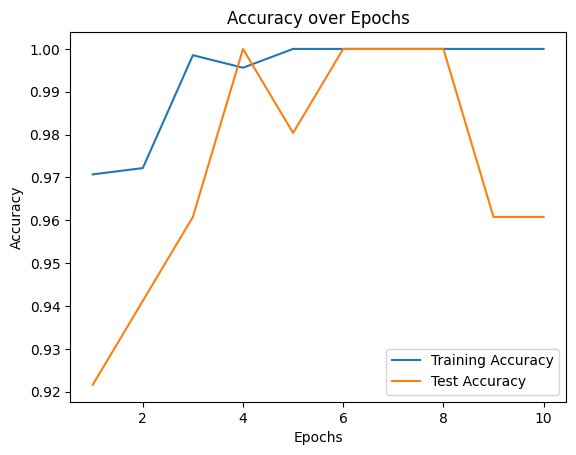

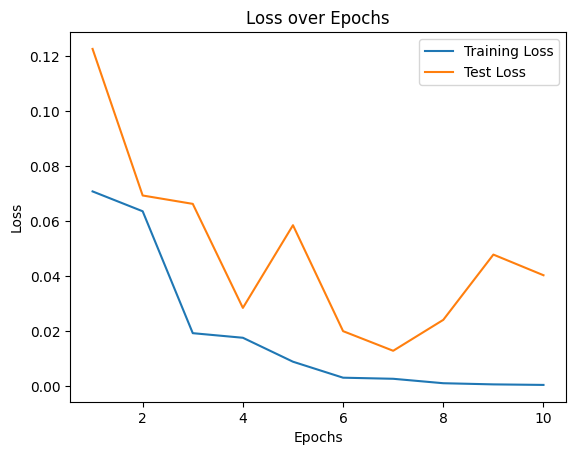

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

epochs = 10

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator)  


train_accuracy = history.history['accuracy']
test_accuracy = history.history['val_accuracy']  

train_loss = history.history['loss']
test_loss = history.history['val_loss']  


plt.plot(range(1, epochs + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, epochs + 1), test_accuracy, label='Test Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


plt.plot(range(1, epochs + 1), train_loss, label='Training Loss')
plt.plot(range(1, epochs + 1), test_loss, label='Test Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Make predictions
predictions = model.predict(test_generator)

# Convert predictions to class labels
predicted_labels = np.where(predictions > 0.5, 'healthy', 'diseased')

# Print the predicted labels
print(predicted_labels)


2/2 [==============================] - 1s 182ms/step
[['diseased']
 ['diseased']
 ['healthy']
 ['diseased']
 ['healthy']
 ['healthy']
 ['diseased']
 ['healthy']
 ['diseased']
 ['diseased']
 ['diseased']
 ['healthy']
 ['healthy']
 ['healthy']
 ['healthy']
 ['healthy']
 ['diseased']
 ['healthy']
 ['healthy']
 ['healthy']
 ['diseased']
 ['diseased']
 ['healthy']
 ['diseased']
 ['diseased']
 ['healthy']
 ['healthy']
 ['diseased']
 ['healthy']
 ['diseased']
 ['diseased']
 ['healthy']
 ['healthy']
 ['diseased']
 ['diseased']
 ['diseased']
 ['healthy']
 ['diseased']
 ['healthy']
 ['diseased']
 ['healthy']
 ['healthy']
 ['diseased']
 ['healthy']
 ['diseased']
 ['healthy']
 ['diseased']
 ['healthy']
 ['healthy']
 ['healthy']
 ['healthy']]
